### reference
- R Package ‘selectiveInference’https://cran.r-project.org/web/packages/selectiveInference/selectiveInference.pdf
- API for selectiveInference https://rdrr.io/cran/selectiveInference/api/

- forward stepwise...変数増加法、有意な説明変数（独立変数）を1つずつ取り込んだり取り除いたりしながら，有意な回帰モデルを作成する方法
- stepwise 法の評価指標...Mallows's Cp, 赤池情報量規準 (Akaike’s Information Criterion, AIC), Bayesian Information Criterion (BIC), RMSECV, MAECV

In [7]:
#( x <- read.table("sample.csv", skip = 0, header=T, sep=",") )
install.packages("selectiveInference")


The downloaded binary packages are in
	/var/folders/fn/nyxc8hg15671d8q7mcn194mc0000gn/T//RtmpuYj6Ir/downloaded_packages


In [23]:
# ( x <- read.csv("sample.csv") )
X <- t(t(read.csv("sample_item.csv",header=T,row.names=1)))
class(X)

[1] "matrix"

In [22]:
y <- t(read.csv("expression.csv",header=T,row.names=1))
#y
class(y)

[1] "matrix"

In [19]:
#library()
library(selectiveInference) 

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

Loading required package: intervals

Attaching package: ‘intervals’

The following object is masked from ‘package:Matrix’:

    expand

Loading required package: survival
Loading required package: adaptMCMC
Loading required package: parallel
Loading required package: coda
Loading required package: MASS



Call:
fsInf(obj = fsfit)

Standard deviation of noise (specified or estimated) sigma = 0.464

Sequential testing results with alpha = 0.100
 Step Var   Coef Z-score P-value LowConfPt UpConfPt LowTailArea UpTailArea
    1   2  0.611   2.500       1      -Inf  -24.442           0          0
    2   3  0.355   1.004       0    35.338      Inf           0          0
    3   1  0.079   0.252       1      -Inf  -31.466           0          0
    4   4 -0.053  -0.190       1    27.583      Inf           0          0

Estimated stopping point from ForwardStop rule = 0

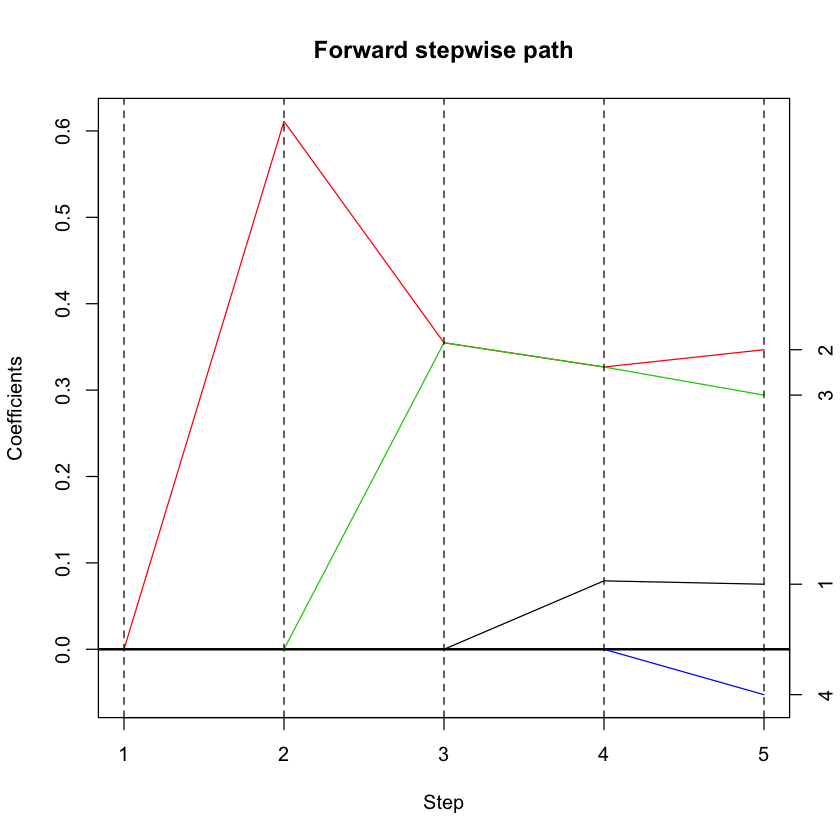

In [24]:
# run forward stepwise, plot results
fsfit = fs(X,y)
plot(fsfit)

# compute sequential p-values and confidence intervals
# (sigma estimated from full model)
out = fsInf(fsfit)
out

<img src = '../images/2019100135025.png' width = 70%>

In [30]:
# run forward stepwise
fsfit = fs(X,y)

# compute sequential p-values and confidence intervals
# (sigma estimated from full model)
out.seq = fsInf(fsfit)
out.seq

# compute p-values and confidence intervals after AIC stopping
out.aic = fsInf(fsfit,type="aic")
out.aic

# compute p-values and confidence intervals after 5 fixed steps
out.fix = fsInf(fsfit,type="all",k=5)
out.fix


Call:
fsInf(obj = fsfit)

Standard deviation of noise (specified or estimated) sigma = 0.464

Sequential testing results with alpha = 0.100
 Step Var   Coef Z-score P-value LowConfPt UpConfPt LowTailArea UpTailArea
    1   2  0.611   2.500       1      -Inf  -24.442           0          0
    2   3  0.355   1.004       0    35.338      Inf           0          0
    3   1  0.079   0.252       1      -Inf  -31.466           0          0
    4   4 -0.053  -0.190       1    27.583      Inf           0          0

Estimated stopping point from ForwardStop rule = 0


Call:
fsInf(obj = fsfit, type = "aic")

Standard deviation of noise (specified or estimated) sigma = 0.464

Testing results at step = 1, with alpha = 0.100
 Var  Coef Z-score P-value LowConfPt UpConfPt LowTailArea UpTailArea
   2 0.611     2.5       1      -Inf  -24.442           0          0

Estimated stopping point from AIC rule = 1


Call:
fsInf(obj = fsfit, k = 5, type = "all")

Standard deviation of noise (specified or estimated) sigma = 0.464

Testing results at step = 4, with alpha = 0.100
 Var   Coef Z-score P-value LowConfPt UpConfPt LowTailArea UpTailArea
   2  0.347   0.900    1.00      -Inf  -38.522        0.00       0.00
   3  0.294   0.721    0.00    40.801      Inf        0.00       0.00
   1  0.075   0.239    1.00      -Inf  -31.533        0.00       0.00
   4 -0.053  -0.190    0.19   -18.262    3.087        0.05       0.05

In [28]:
result = randomizedLasso(X, y, 0.5)
inf_result = randomizedLassoInf(result)
print(inf_result )

$targets
$targets$observed_target
       TF1        TF2        TF4 
0.28888889 0.57777778 0.04444444 

$targets$cov_target
             X_ETF1       X_ETF2       X_ETF4
X_ETF1  0.076378601 -0.062057613 -0.004773663
X_ETF2 -0.062057613  0.090699588 -0.009547325
X_ETF4 -0.004773663 -0.009547325  0.040576132

$targets$crosscov_target_internal
           X_ETF1        X_ETF2        X_ETF4
TF1 -2.148148e-01  1.804112e-16 -1.387779e-17
TF2 -4.510281e-17 -2.148148e-01 -1.387779e-17
TF3 -6.683128e-02 -1.336626e-01  3.102881e-02
TF4 -3.816392e-17  2.775558e-17 -2.148148e-01


$pvalues
       TF1        TF2        TF4 
0.33334696 0.07867474 0.21311309 

$ci
          [,1]      [,2]
TF1 -0.2156272 0.7731776
TF2  0.1286500 1.5908477
TF4 -0.7857386 0.2102198

$opt_samples
               [,1]       [,2]         [,3]
   [1,] 0.302806270 0.50608811 8.121016e-02
   [2,] 0.274816055 0.50151302 6.485925e-02
   [3,] 0.273190500 0.50066536 6.637453e-02
   [4,] 0.242149494 0.53624083 1.101674e-01
   [5,] 0.